In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_hastie_10_2


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# SKLearn Gradient Boosted Classifier

{'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 1, 'subsample': 0.1}


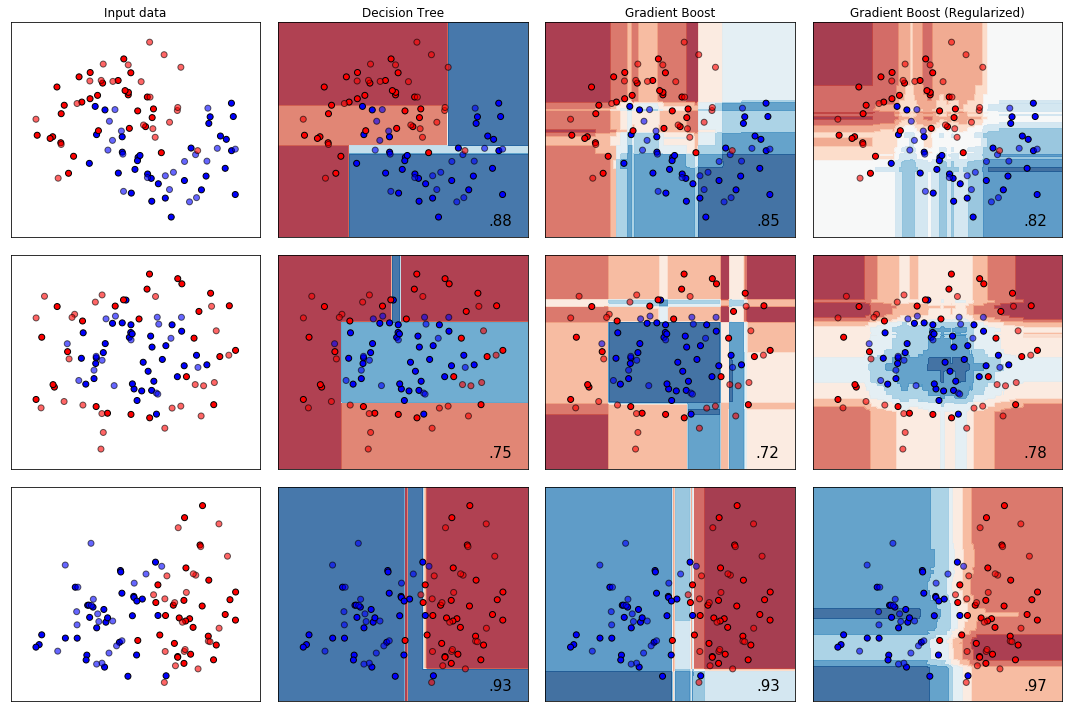

In [2]:
#################
# Generate Data #
#################
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


#############################
# Hyperparameter Tune Model #
#############################
from sklearn.model_selection import GridSearchCV
params = {
    ### Shrinkage
    'learning_rate':np.arange(0.1,1.1,.1),
    ### Stochastic Gradient Boosting
    'subsample':np.arange(0.1,1.1,.1),
    ### Modify Tree Shape
    'max_depth':np.arange(1,5,1),
    'min_samples_leaf':[0.1,0.3,0.5,1]
}
gbc = GradientBoostingClassifier(n_estimators=100)
gs_cv = GridSearchCV(gbc,params,cv=5).fit(X,y)
print(gs_cv.best_params_)

####################
# Classifier Array #
####################
names = ["Decision Tree", 
         "Gradient Boost",
         "Gradient Boost (Regularized)"
]

classifiers = [
    DecisionTreeClassifier(max_depth=3),
    GradientBoostingClassifier(),
    GradientBoostingClassifier(**gs_cv.best_params_)
]

################
# Plot Results #
################
h = .02  # step size in the mesh
figure = plt.figure(figsize=(15, 10))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# SKLearn Gradient Boosted Regressor

{'learning_rate': 0.30000000000000004, 'max_depth': 1, 'min_samples_leaf': 1, 'subsample': 1.0}


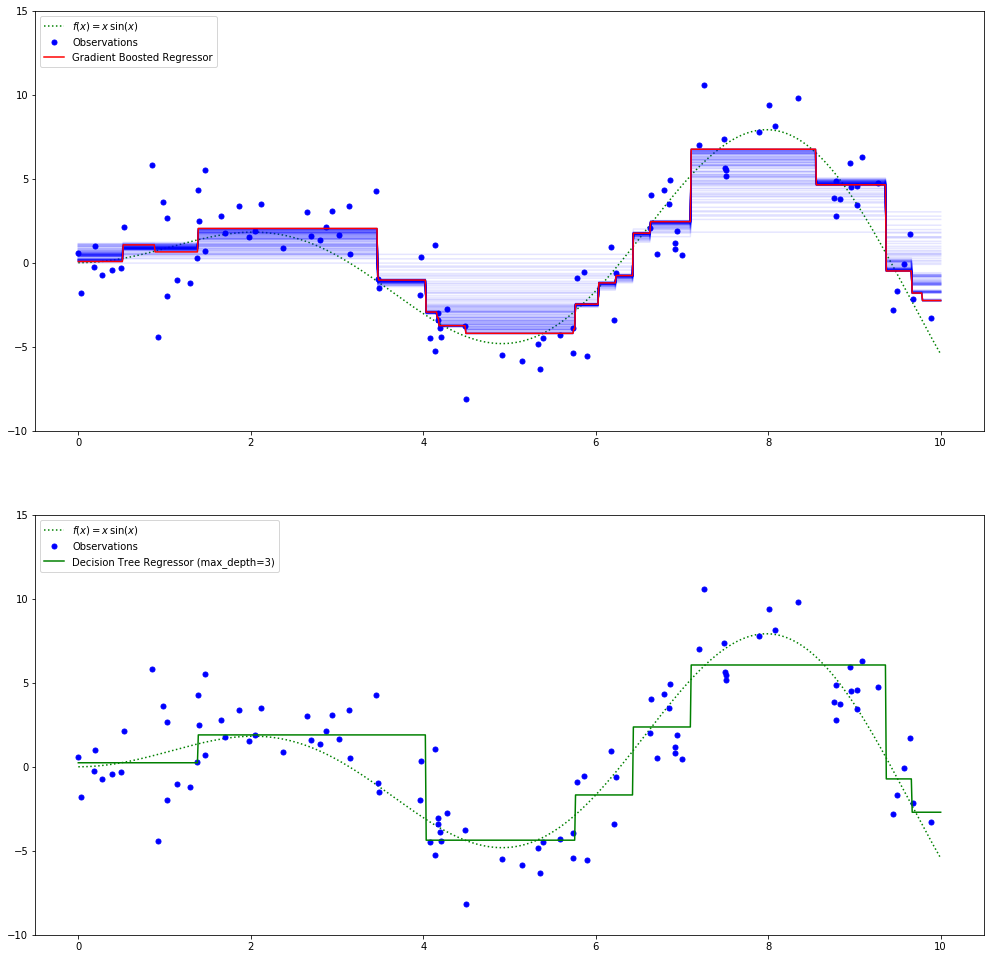

In [5]:
#########################
# Create Random Dataset #
#########################
np.random.seed(1)
def f(x):
    """The function to predict."""
    return x * np.sin(x)

#  First the noiseless case
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
X = X.astype(np.float32)
# Observations
y = f(X).ravel()
dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
y = y.astype(np.float32)
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
xx = xx.astype(np.float32)

#############################
# Hyperparameter Tune Model #
#############################
from sklearn.model_selection import GridSearchCV
params = {
    'learning_rate':np.arange(0.1,1.1,.1),
    'subsample':np.arange(0.1,1.1,.1),
    'max_depth':np.arange(1,5,1),
    'min_samples_leaf':[0.1,0.3,1]
    #'n_estimators':np.arange(100,1100,100)
}
gbr = GradientBoostingRegressor(n_estimators=100)
gs_cv = GridSearchCV(gbr,params,cv=5).fit(X,y)
print(gs_cv.best_params_)

################################
# Fit Gradient Boost Regressor #
################################
gbr = GradientBoostingRegressor(**gs_cv.best_params_)
gbr.fit(X, y)
y_pred_gbr = gbr.predict(xx)

###############################
# Fit Decision Treel Regressor#
###############################
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X, y)
y_pred_dtr = dtr.predict(xx)

################
# Plot Results #
################
fig = plt.figure(figsize=(17,17))

ax = plt.subplot(2, 1, 1)
ax.plot(xx, f(xx), 'g:', label=u'$f(x) = x\,\sin(x)$')
ax.plot(X, y, 'b.', markersize=10, label=u'Observations')
## staged predict - allows monitoring after each stage.
for y_pred in gbr.staged_predict(xx):
    ax.plot(xx[:,0], y_pred,'b', alpha=0.1)
ax.plot(xx, y_pred_gbr, 'r', label=u'Gradient Boosted Regressor')  
ax.legend(loc='upper left')
ax.set_ylim(-10, 15)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(xx, f(xx), 'g:', label=u'$f(x) = x\,\sin(x)$')
ax2.plot(X, y, 'b.', markersize=10, label=u'Observations')
ax2.plot(xx, y_pred_dtr, 'g', label=u'Decision Tree Regressor (max_depth=3)')
ax2.legend(loc='upper left')
ax2.set_ylim(-10, 15)

plt.show()

# Regularization

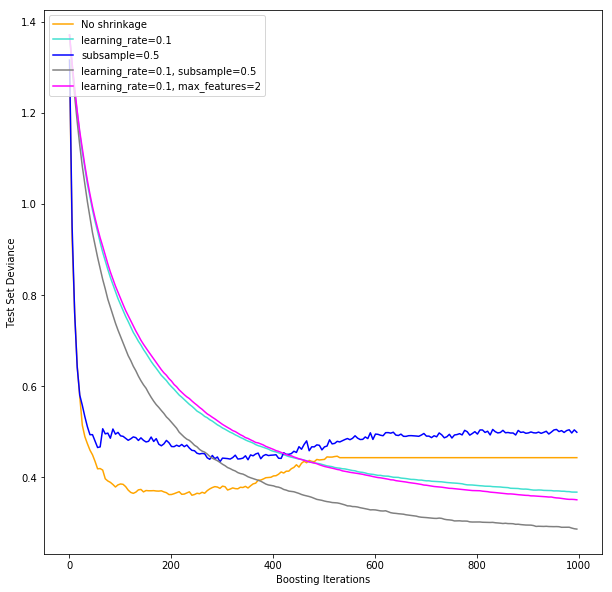

In [7]:
X, y = make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure(figsize=(10,10))

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

### References

#### Plotting
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-quantile-py

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py



#### Ensemble Modules
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

#### Grid Search and Regularization
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html